## Class Announcements

### Due Today
- Project review

### Due Friday:
- D3

### Due Monday:
- Q4

### Notes:
- **Only 1 week until your project proposal is due!!@#!@#!@#**
- Repo invites:Take it ASAP, they become invalid after 7 days

# Descriptive and Exploratory Data Analysis

Let's explore some toy datasets, and see what's in there.  [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) is our tool of choice for both data wrangling and also a basic descriptive analysis. [Seaborn](https://seaborn.pydata.org/) is the tool we will be using to do our graphical EDA, but it is also true that much of this can be accomplished (uglier, slower) in Pandas. You will find the docs on these websites to be very useful... always have them open in another browser tab.

Finally we will show you [Missingno]() a tool that you might find useful to explore missing data.  This is a much simpler package than the others, but I often find it useful. It certainly isn't nearly as common to see out in the wild as the first two.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS108/Lectures-Fa23/blob/main/Week_04/04_12_EDA.ipynb)


In [1]:
# you probably don't already have this package installed, so lets do that
%pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

%matplotlib inline

sns.set_theme(context='notebook',
              style='white',
              font_scale=1.5)

In [3]:
# hey, it turns out seaborn has a nice routine
# that allows us to grab toy datasets to play with
print( sns.get_dataset_names() )
penguins = sns.load_dataset('penguins')
penguins

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
# you can already see the columns because this data is pretty small,
# but that won't always be the case... so here's how you can see them in general
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:

penguins.shape

(344, 7)

In [6]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [7]:
# Not that many Chinstraps!
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [9]:
# are there any relationships between
# two categorical variables?
# sometimes it turns out that one variable
# can actually stand in for another variable
# think statistical confounds, which can cause a lot of problems
penguins[['species','island']].value_counts()

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Name: count, dtype: int64

In [10]:
penguins['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [11]:
# turns out that thankfully we have a fairly even number
# of males and females for each species
(
    penguins[['species','sex']]
    .value_counts()
    #.to_frame()
    #.sort_values(by=['species','sex'])
)



species    sex   
Adelie     Female    73
           Male      73
Gentoo     Male      61
           Female    58
Chinstrap  Female    34
           Male      34
Name: count, dtype: int64

In [12]:
# the full set of interactions
# printed pretty
(
    penguins[['species','island','sex']]
    .value_counts()
    .to_frame()
    .sort_values(by=['species','island','sex'])
)



count
species   island    sex          
Adelie    Biscoe    Female     22
                    Male       22
          Dream     Female     27
                    Male       28
          Torgersen Female     24
                    Male       23
Chinstrap Dream     Female     34
                    Male       34
Gentoo    Biscoe    Female     58
                    Male       61

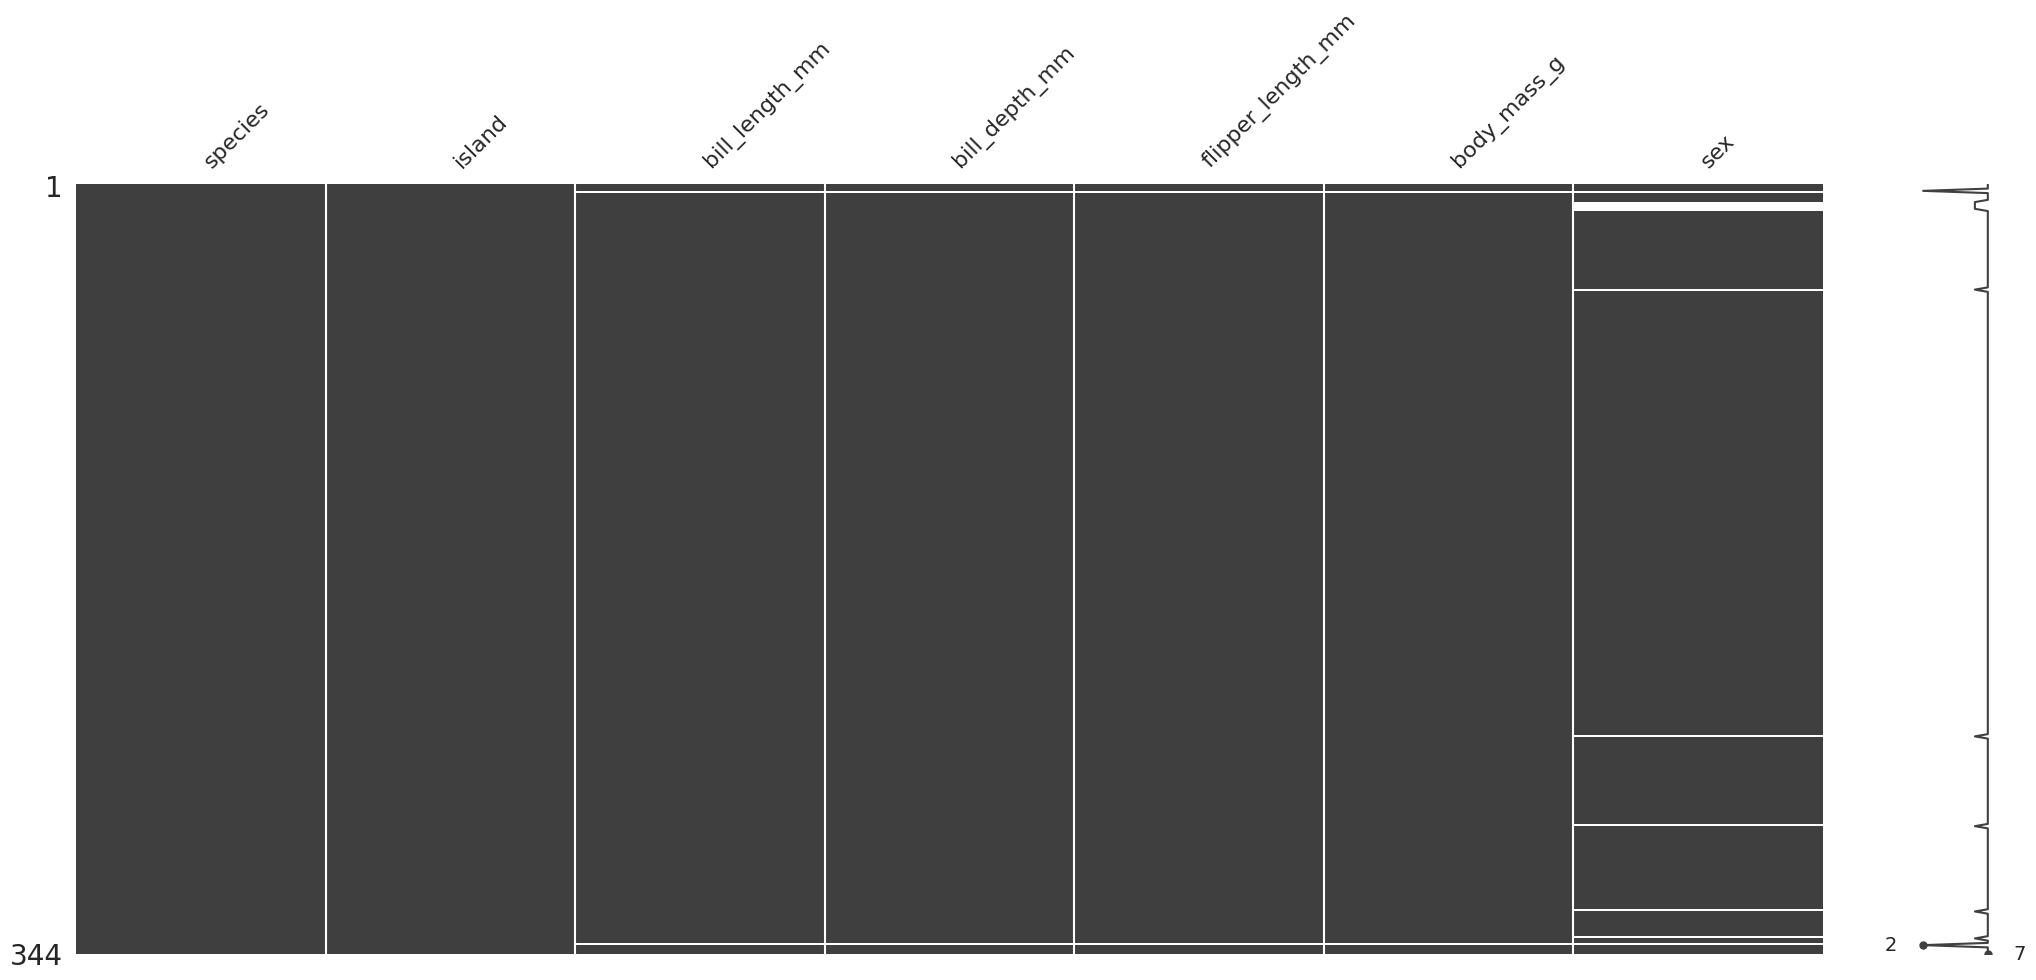

In [13]:
# are there any missing data?
# in the matrix display, missing data in a particular row is shown as white
# available data is black
# look for lines across multiple columns!
msno.matrix(penguins);

In [ ]:
# turns out if one length measurement is missing they ALL are
msno.heatmap(penguins);

In [ ]:
# so it looks like there are only 11 penguins with missing data
penguins.dropna()

In [ ]:
# bonus question for you to think about on your own....
missing = pd.isna(penguins).any(axis='columns')
print(missing)
penguins['missing'] = missing
# now how could you figure out if there is a systematic relationship between
# species, island, sex and whether a penguins data is missing any measurements
# do some work here in this cell to figure it out!
# or go ahead and insert as many cells here as you need

In [ ]:
# we don't want our missing column after finishing the stuff above
# and we decide to drop the 11 penguins with any missing data
# since that's only 3% of our data
penguins = penguins.drop(columns='missing').dropna()

In [ ]:
penguins.describe()

In [ ]:
# ugh those histograms do not look very normal!!
sns.pairplot(penguins);

In [ ]:
# sometimes animals are sexually dimorphic yo!
sns.pairplot(penguins, hue='sex');

In [ ]:
# ah that's much better... almost normal...
# and combined with above you can kinda see that for each species
# the females do appear to be smaller than the males
sns.pairplot(penguins, hue='species');

In [ ]:
# but there is clearly a better way to show this than a scatter plot
# while a table contains all the info, it is ugly and hard to read!!
penguins.groupby(['species','sex']).describe().T

In [ ]:
# so lets do boxplots to compare each measure we may care about
sns.boxplot(data=penguins,x='species',y='flipper_length_mm', hue='sex');

In [ ]:
sns.boxplot(data=penguins,x='species',y='bill_length_mm', hue='sex');

In [ ]:
sns.boxplot(data=penguins,x='species',y='body_mass_g', hue='sex');

In [ ]:
# ok lets see if there's a dimensionality reduction method that
# can help us see patterns of quantitative variables in their
# relationships with categorical variables.
# so to do that we need labels for the categorical variables we are interested in
labels = penguins.species + '-' + penguins.sex
print( labels.unique() )

# do a PCA of the data
from sklearn.decomposition import PCA
PCA_peng = PCA(n_components=2)
PCs_peng = PCA_peng.fit_transform(penguins[['flipper_length_mm','bill_length_mm','bill_depth_mm','body_mass_g']])

# turn the numpy array into a dataframe for plotting
PCs_peng = pd.DataFrame.from_records(PCs_peng,columns=['PC1','PC2'])
PCs_peng['labels']=labels

sns.scatterplot(data=PCs_peng, x='PC1', y='PC2', hue='labels')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

If this is a descriptive analysis we've basically done our job by the time we finished making the `.describe()` table a few cells ago.

But if we are doing EDA not only do we prefer the graphical presentation of things like `sns.pairplot()` and `sns.boxplot()`, but we are also allowed to interpret the things we observe in those plots.

So how would you describe what you observe here?  What do you think about the relationships between the categorical variables (species, island, sex) and the continuous number variables (flipper length, bill length and depth, body mass)?  Do you see any patterns?

In the next cell you can add in your own interpretations of what you see if you'd like

In [ ]:
# now go explore a new dataset completely on your own!!
taxis = sns.load_dataset('taxis')
taxis

In [ ]:
# jasons starting suggestion
# lets take a look at the timeframe covered by this dataset
taxis.pickup.describe()